# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [2]:
import numpy as np
import pandas as pd

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [5]:
data = pd.read_excel( 'C:\\Users\\2-hom\\Documents\\Data_analysis\\Машинное обучение\\Занятие_13\\Homework\\Homework\\geo.xlsx' )
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [6]:
data.shape

(108806, 4)

1. Визуально разделим город на районы безотносительно голосов (проведем кластеризацию и выведим картинку)

#### Дендограмма

In [7]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [8]:
X = data[['x','y']]

In [9]:
X

,x,y
0,37.612416,55.777454
1,37.612416,55.777454
2,37.603298,55.742108
3,37.558526,55.728758
4,37.566431,55.731794
...,...,...
108801,37.454528,55.792331
108802,37.384325,55.899068
108803,37.421066,55.848756
108804,37.448509,55.793065


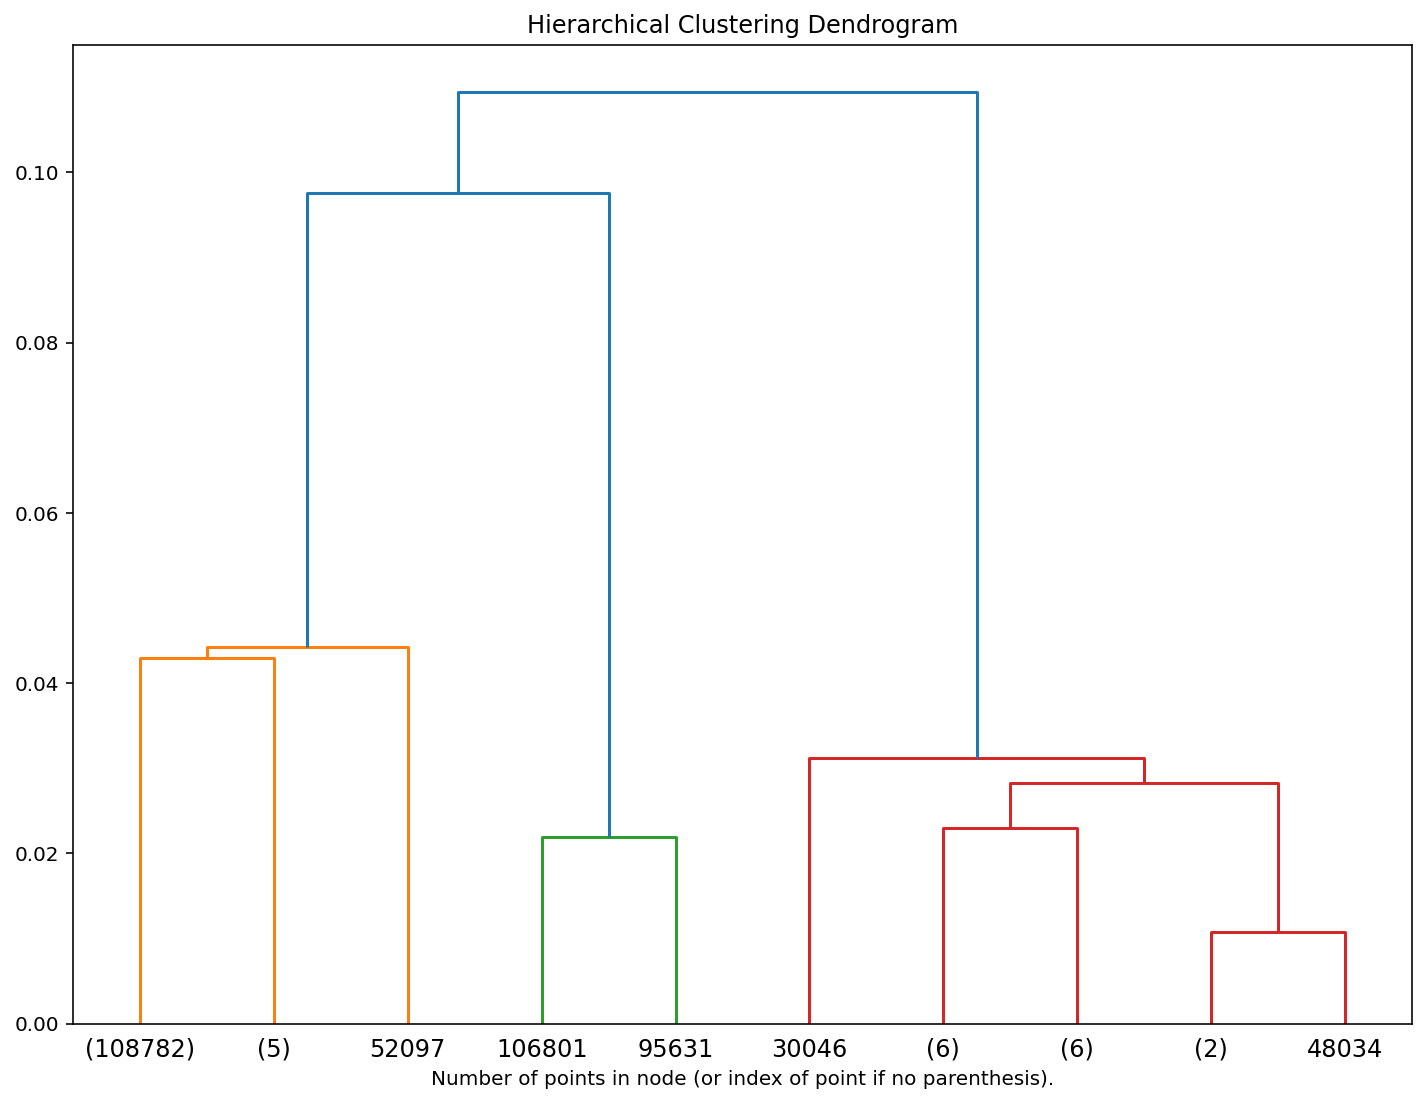

In [10]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')


X_sng = X.sample(frac = 1)
model = model.fit(X_sng)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

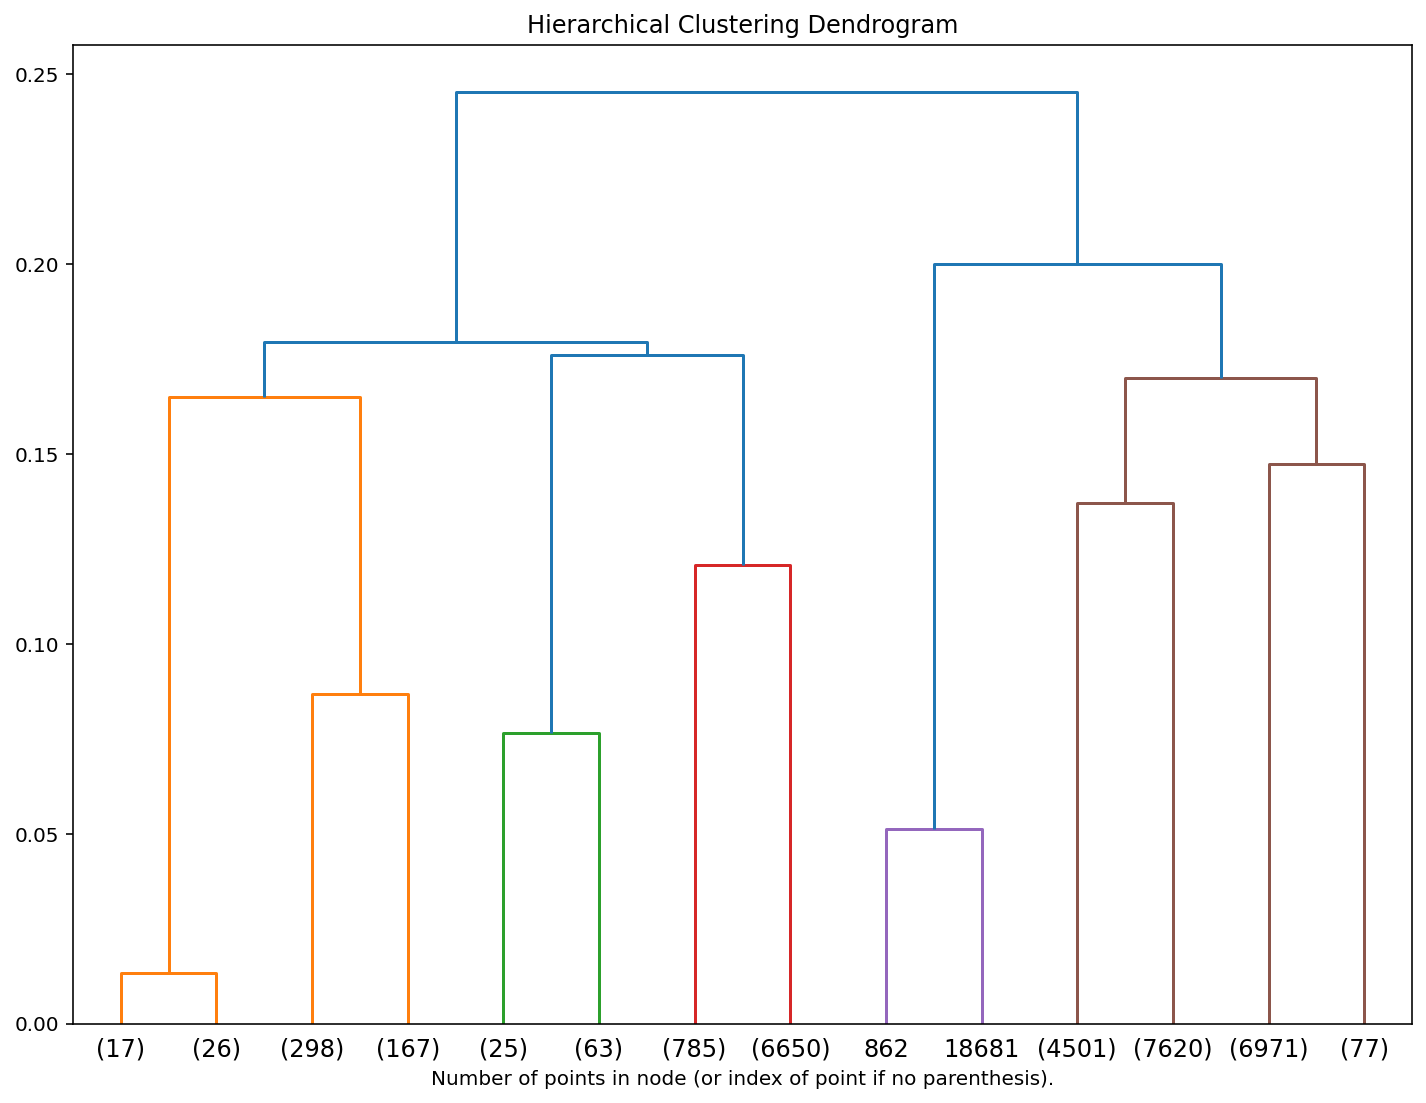

In [11]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')


X_avg = X.sample(frac = 0.25) 
model = model.fit(X_avg)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

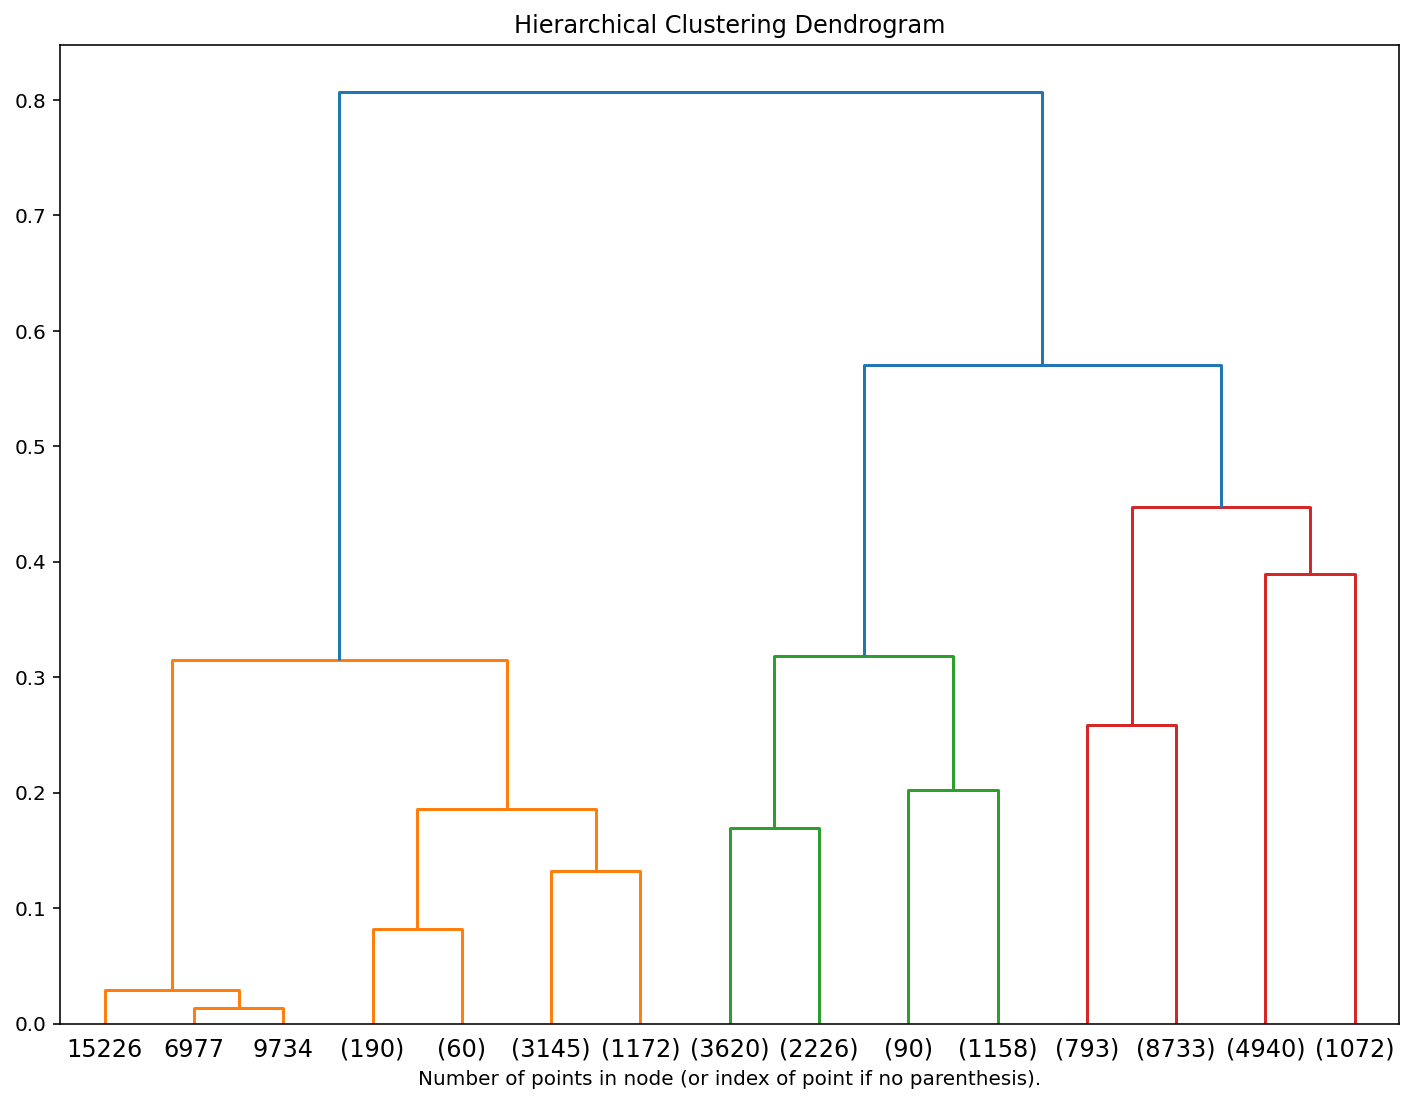

In [12]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')

X_cmp = X.sample(frac = 0.25)
model = model.fit(X_cmp)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

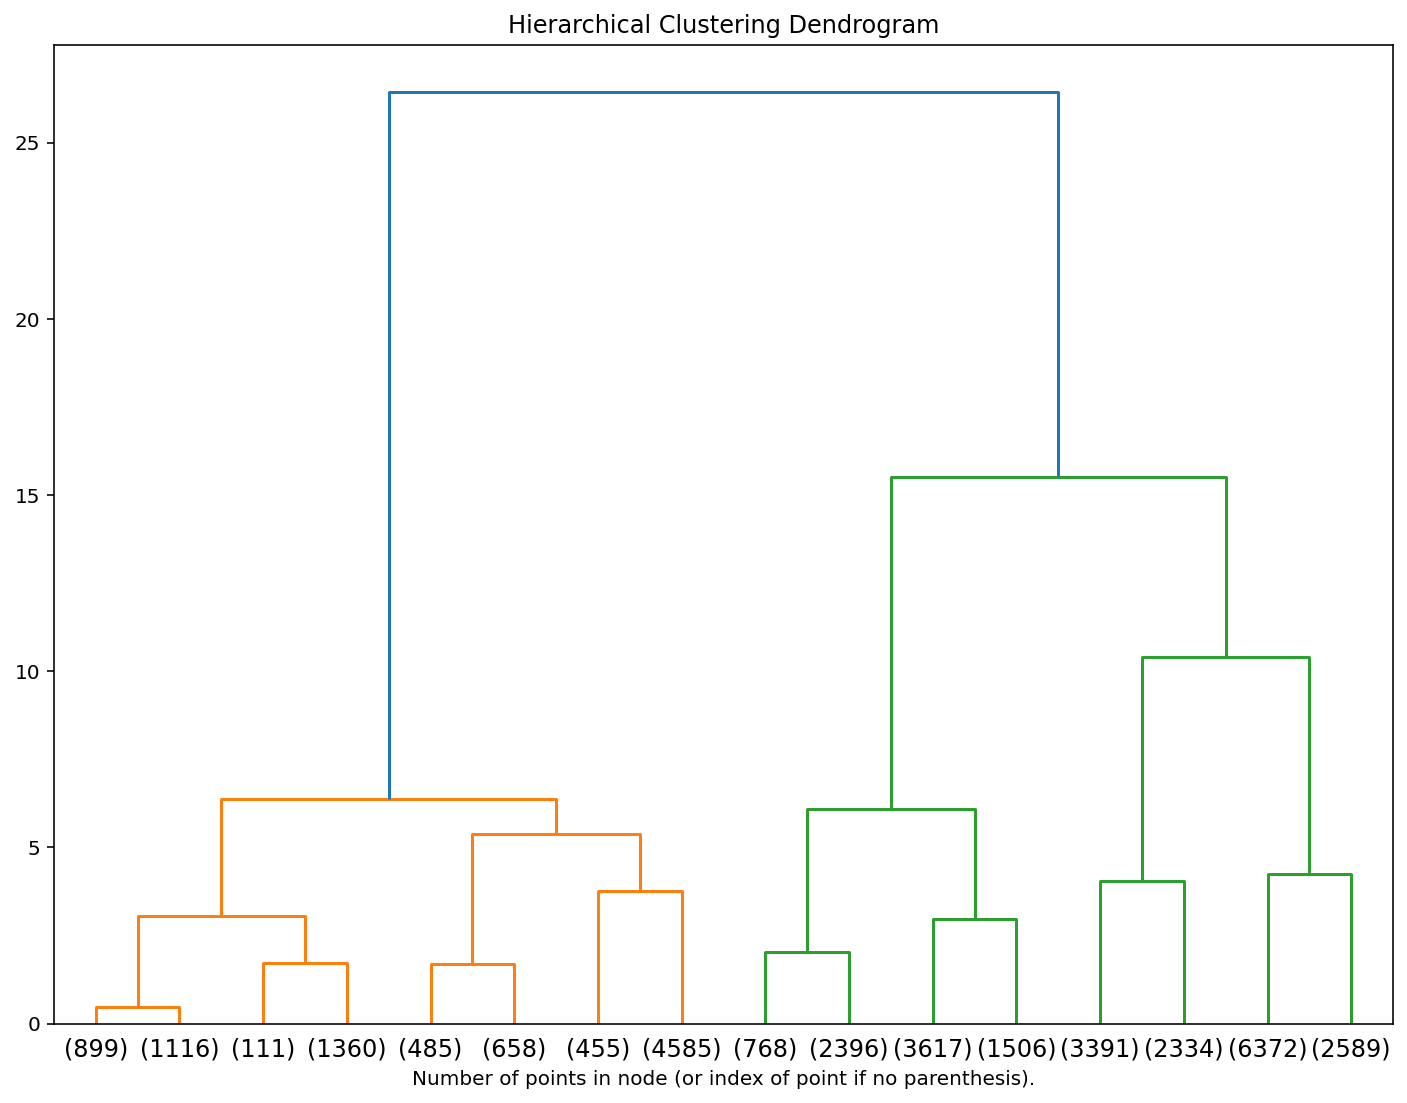

In [13]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')


X_wrd = X.sample(frac = 0.3)
model = model.fit(X_wrd)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [14]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

x = np.zeros((150,2))
np.random.seed(seed=42)
x[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
x[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)
x[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
x[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)
x[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
x[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)

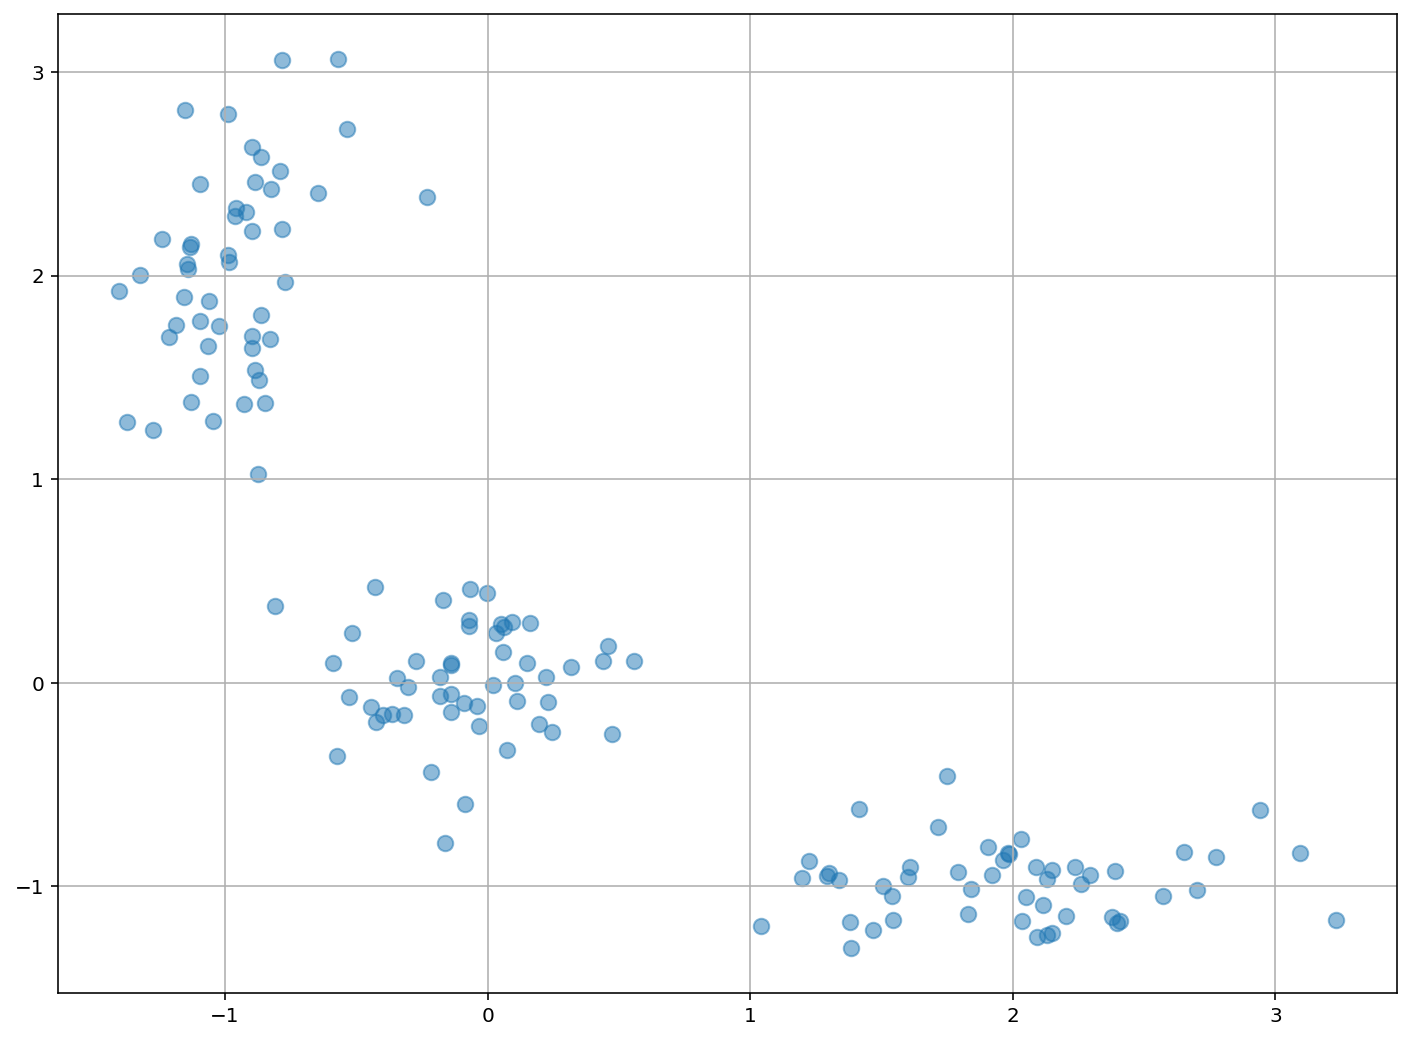

In [15]:
plt.scatter(x[:,0],x[:,1], s=60, alpha=0.5)
plt.grid()

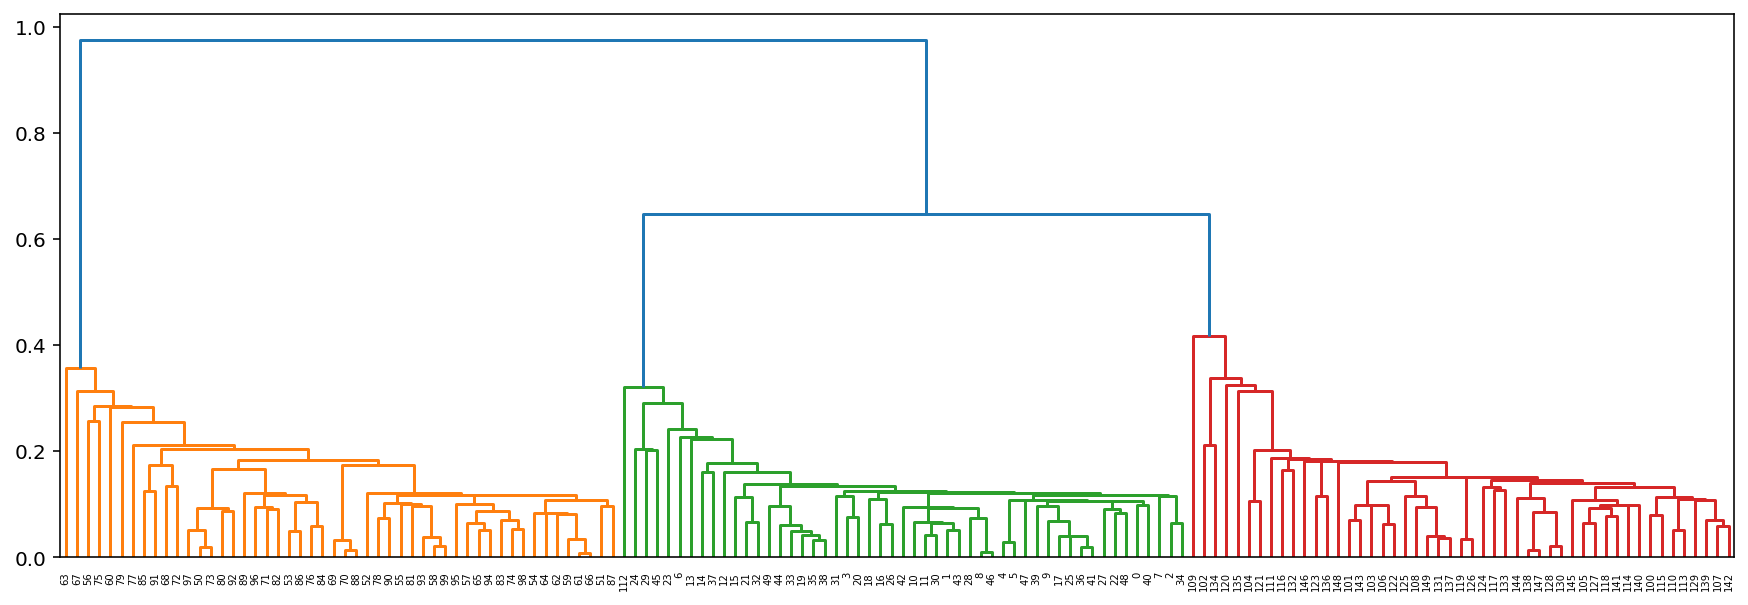

In [16]:
distance_mat = pdist(x)

Z= hierarchy.linkage(distance_mat, 'single')
plt.figure(figsize=(15,5))
dn = hierarchy.dendrogram(Z,color_threshold=0.5)

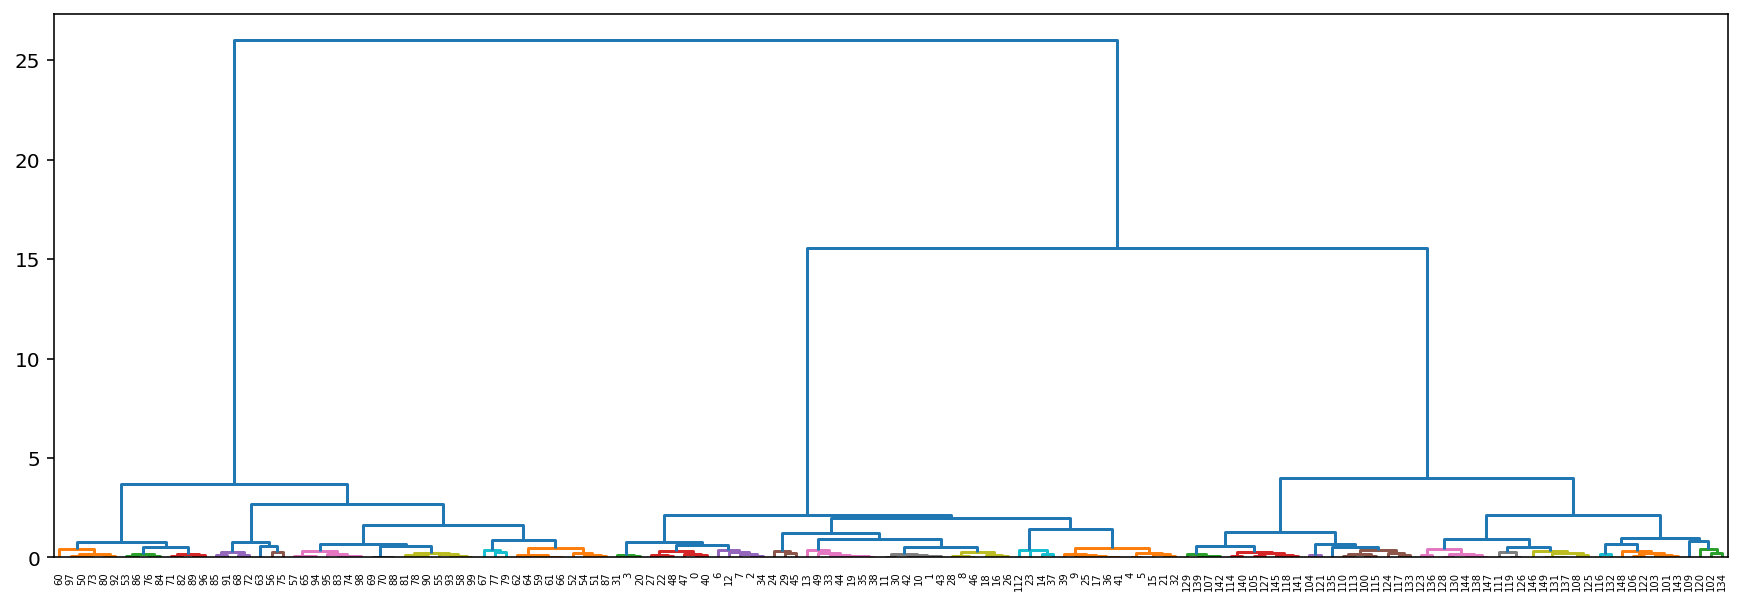

In [17]:
Z= hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(15,5))
dn = hierarchy.dendrogram(Z,color_threshold=0.5)

#### DBSCAN

In [18]:
X.sample(10)

,x,y
1107,37.669279,55.672565
11150,37.617518,55.768826
88470,37.600989,55.791668
46494,37.767896,55.761487
39598,37.795475,55.806985
106170,37.424300,55.858822
93446,37.454528,55.792331
19209,37.569342,55.819252
4643,37.636617,55.769545
34917,37.805293,55.799532


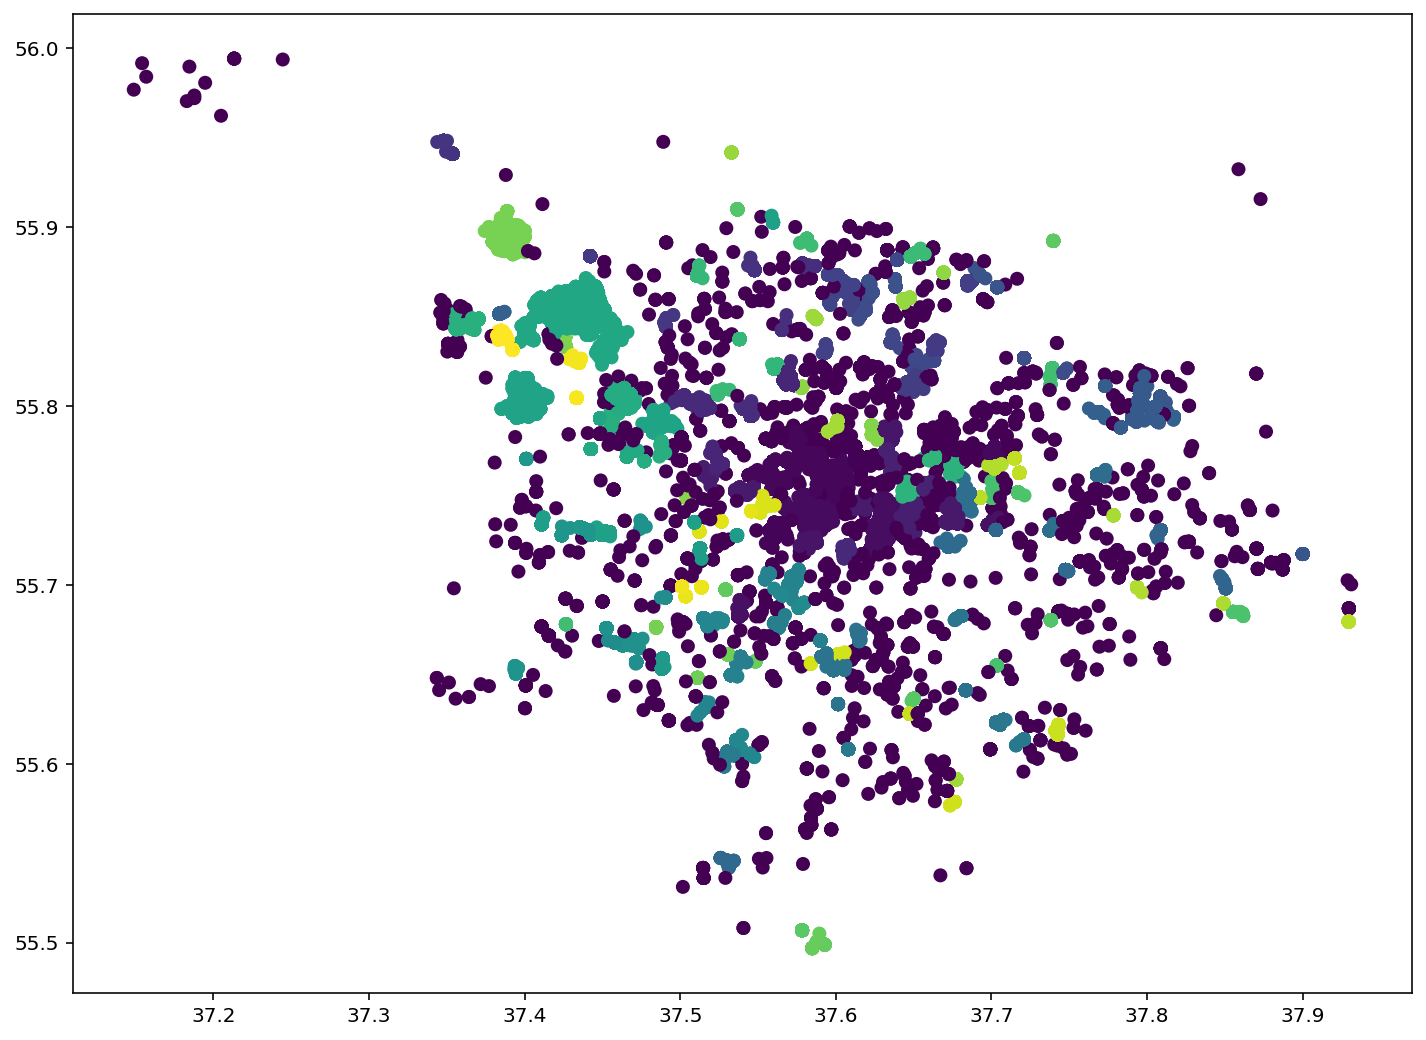

In [22]:
scan_moons = DBSCAN(eps=0.005, min_samples=25) # если запустить метод без указания eps то все точки в один кластер
y_moons = scan_moons.fit_predict(X)
plt.figure(figsize=(12,9))
plt.scatter(X['x'], X['y'], c=y_moons)
plt.show()

In [23]:
labels = scan_moons.labels_

In [24]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 176


2. Исследуем скопления голосов за и против 

In [25]:
X1 = data[['x','y','comment_class']]

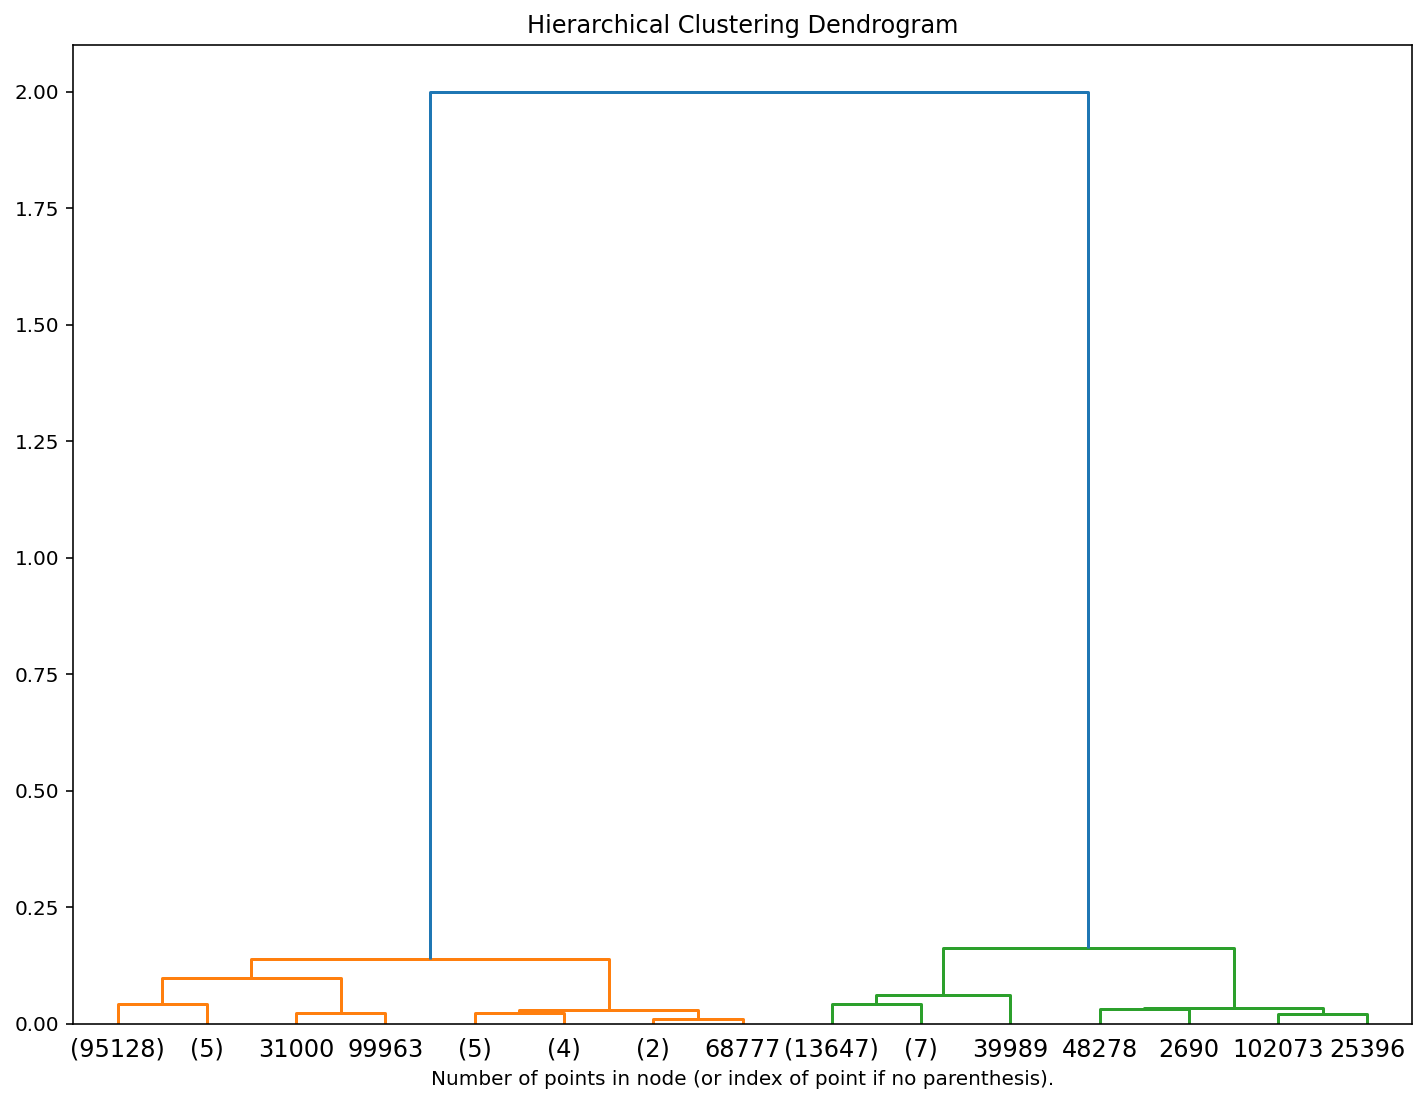

In [26]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')


X1_sng = X1.sample(frac = 1)
model = model.fit(X1_sng)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

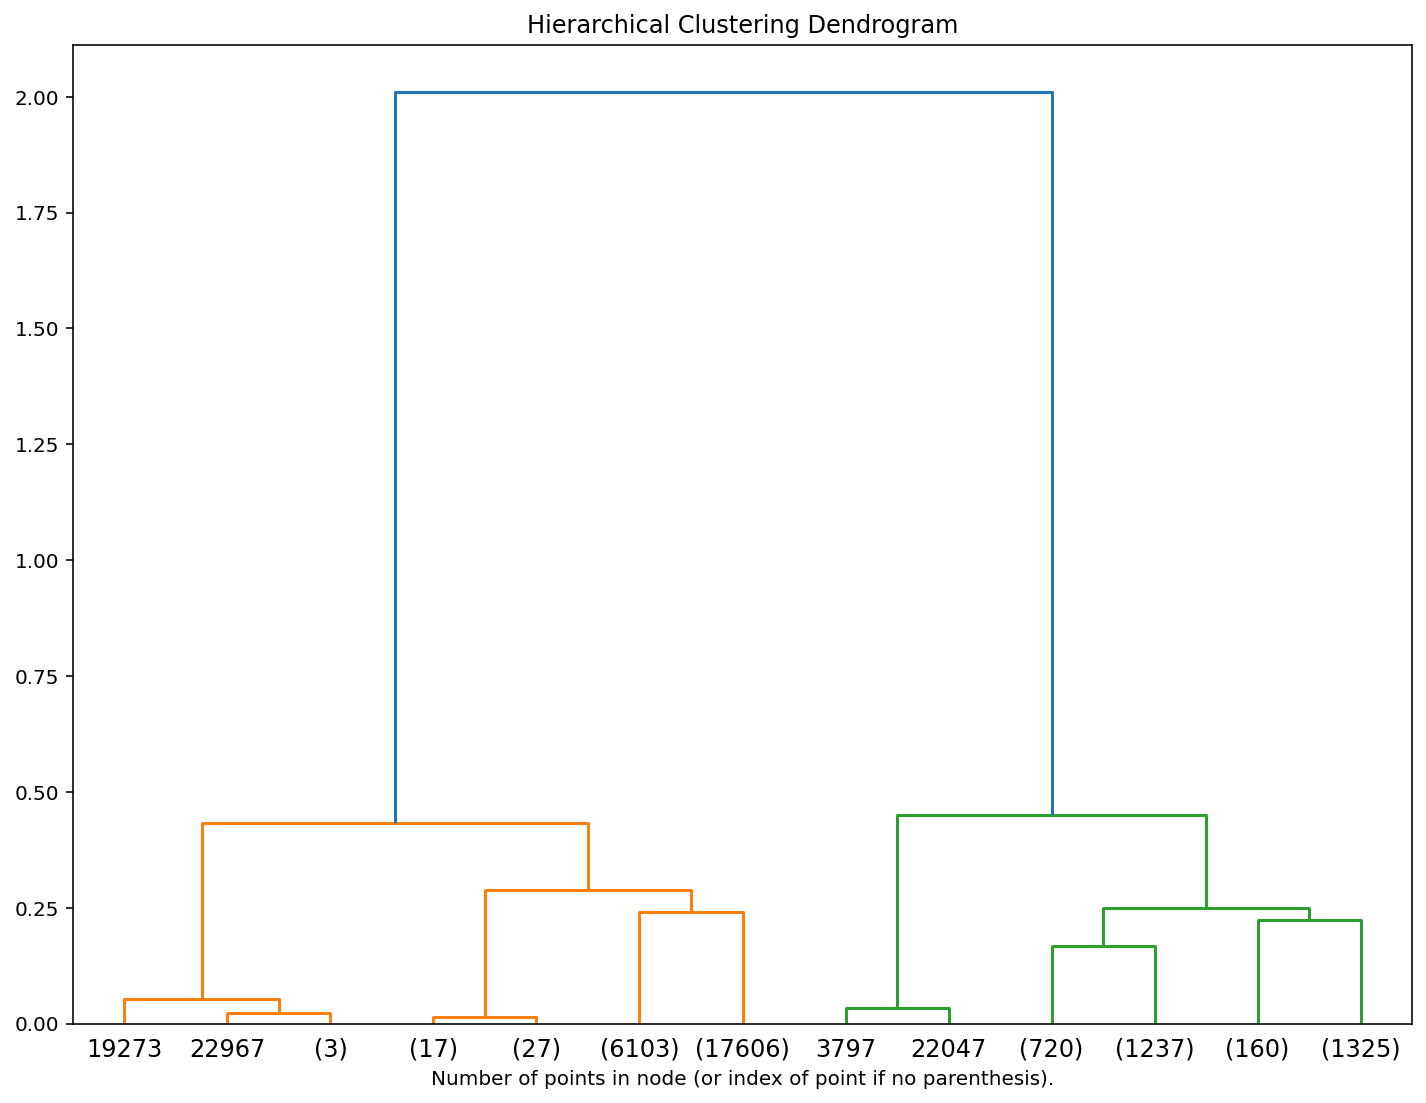

In [27]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')


X1_avg = X1.sample(frac = 0.25) 
model = model.fit(X1_avg)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

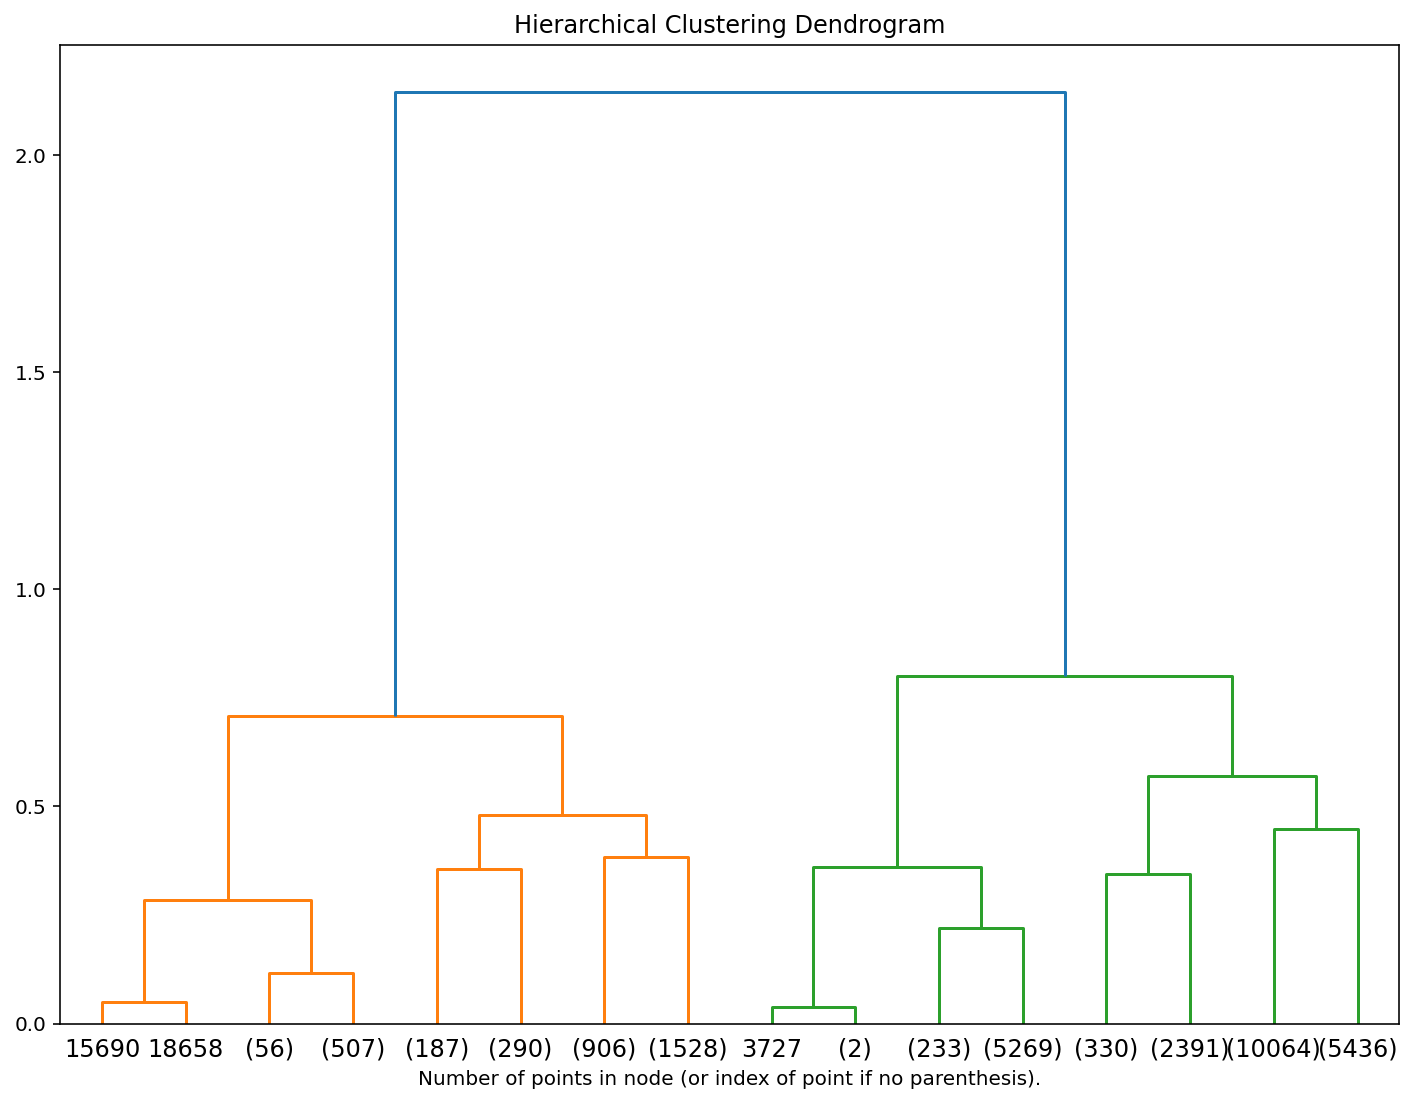

In [28]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')

X1_cmp = X1.sample(frac = 0.25)
model = model.fit(X1_cmp)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

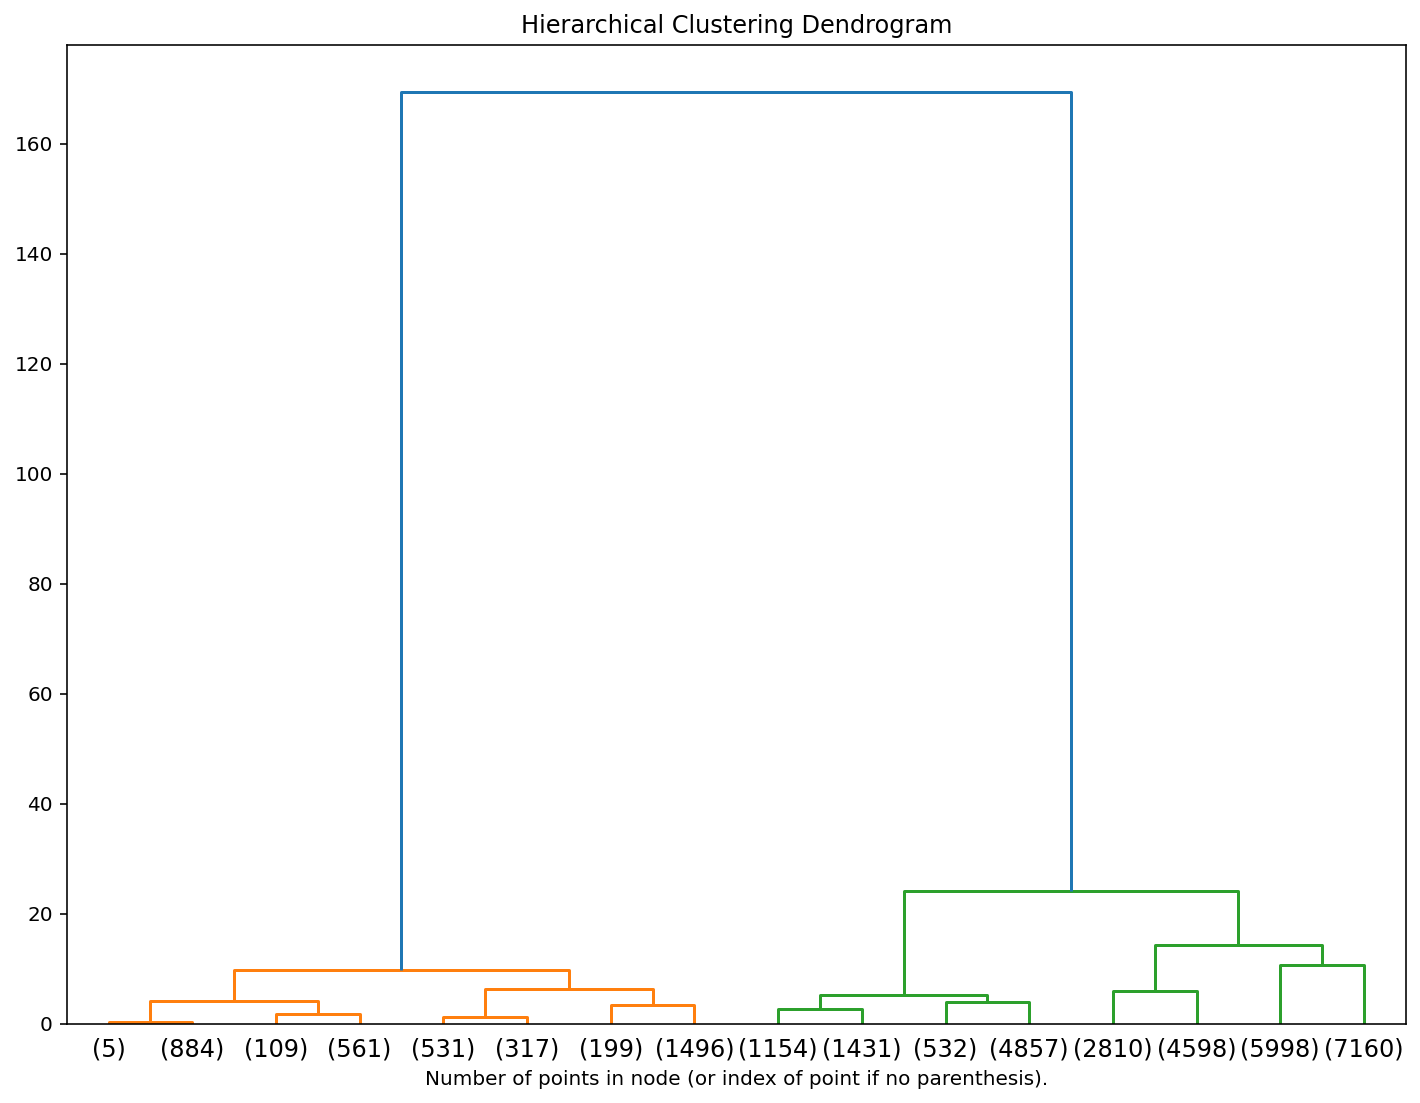

In [29]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')


X1_wrd = X1.sample(frac = 0.3)
model = model.fit(X1_wrd)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [30]:
X1.sample(10)

,x,y,comment_class
29510,37.547719,55.875930,-1
21095,37.442095,55.883792,-1
27994,37.442095,55.883792,-1
87241,37.407663,55.806540,-1
97632,37.407888,55.807592,1
75166,37.465002,55.668935,-1
52944,37.747595,55.708313,-1
79207,37.488808,55.658870,-1
36249,37.805293,55.799532,1
80488,37.490470,55.693049,-1


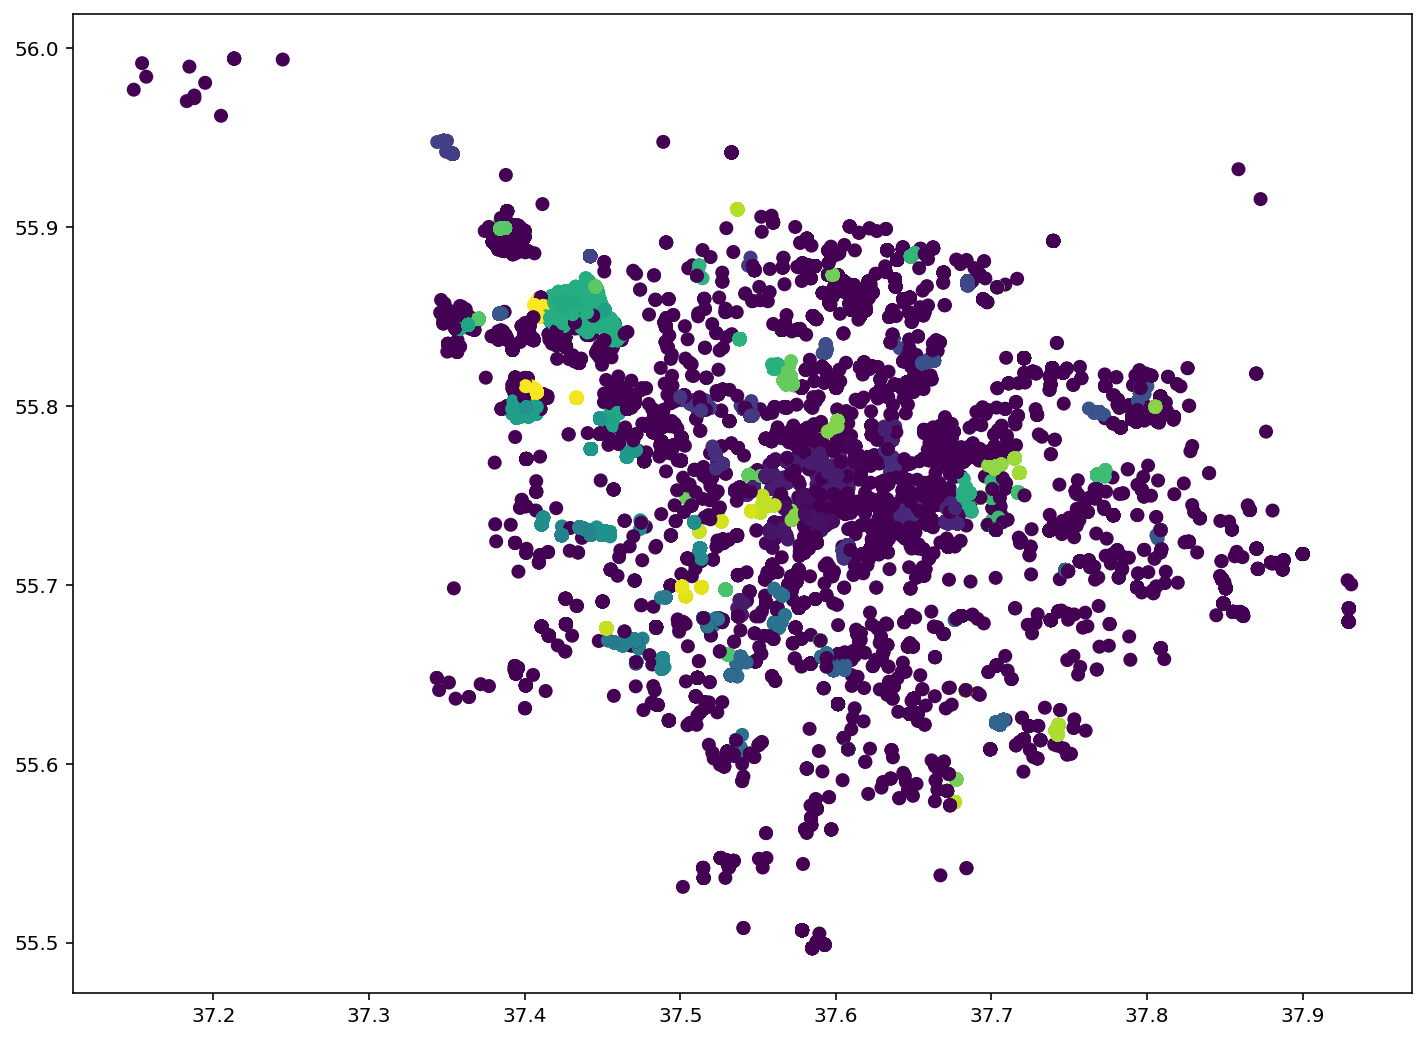

In [39]:
scan_moons = DBSCAN(eps=0.005, min_samples=87) # если запустить метод без указания eps то все точки в один кластер
y_moons = scan_moons.fit_predict(X1)
plt.figure(figsize=(12,9))
plt.scatter(X1['x'], X1['y'], c=y_moons)
plt.show()

##### Подбор количества кластеров для KMeans

In [32]:
k_inertia = []
ks = range(1,100)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X, )
    k_inertia.append(clf_kmeans.inertia_)

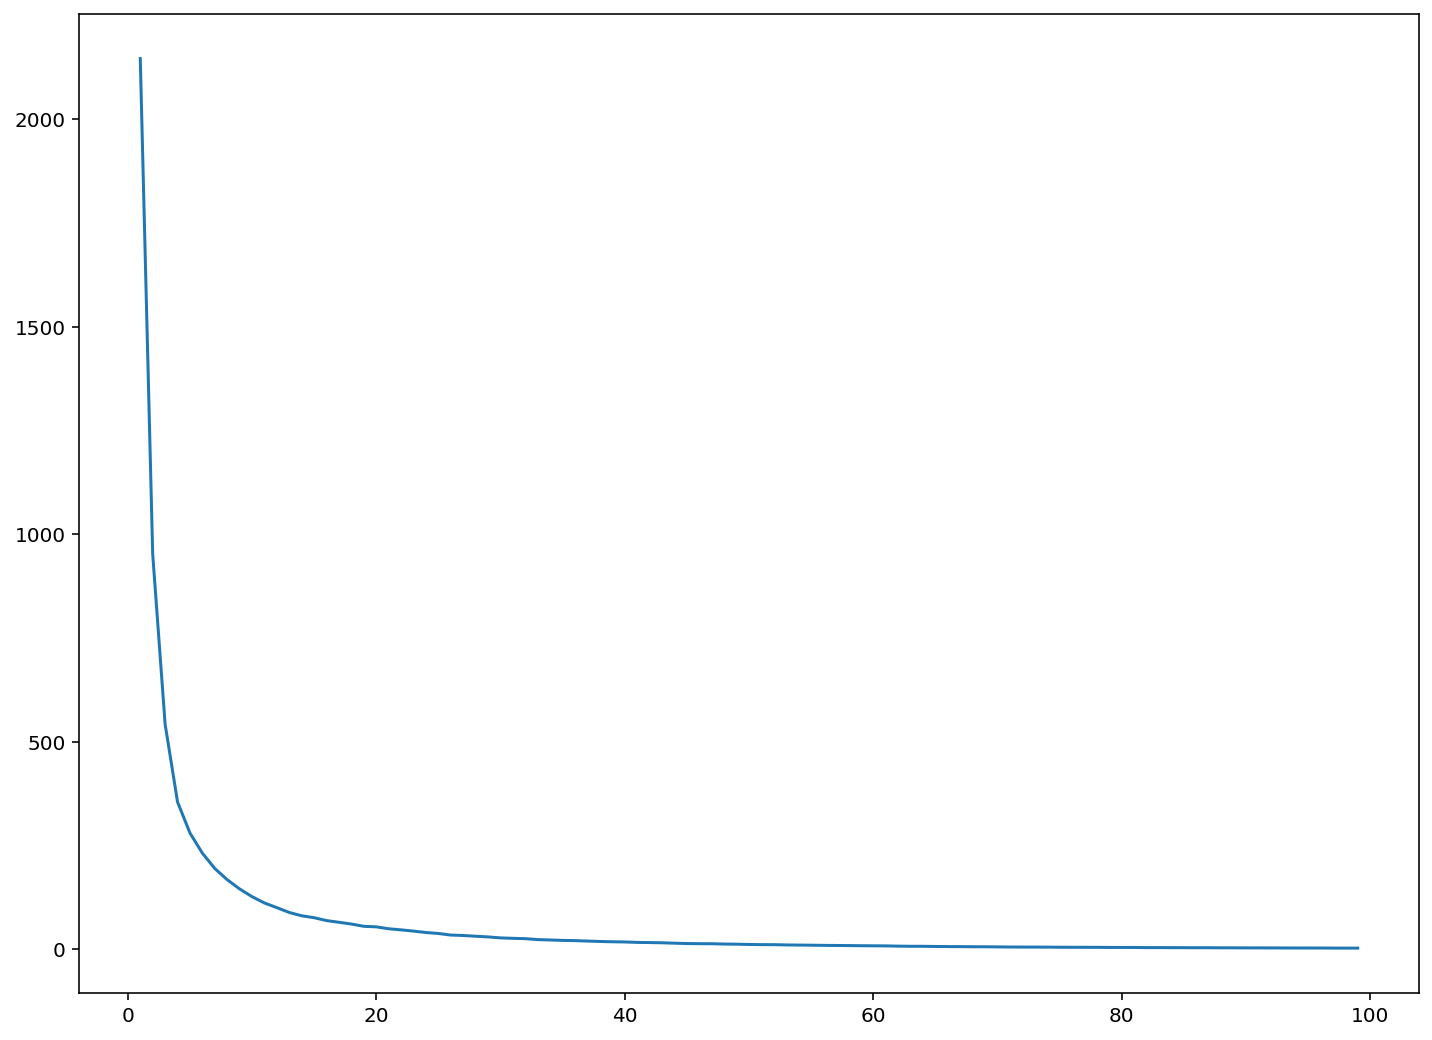

In [33]:
plt.plot(ks, k_inertia)

In [34]:
diff = np.diff(k_inertia)

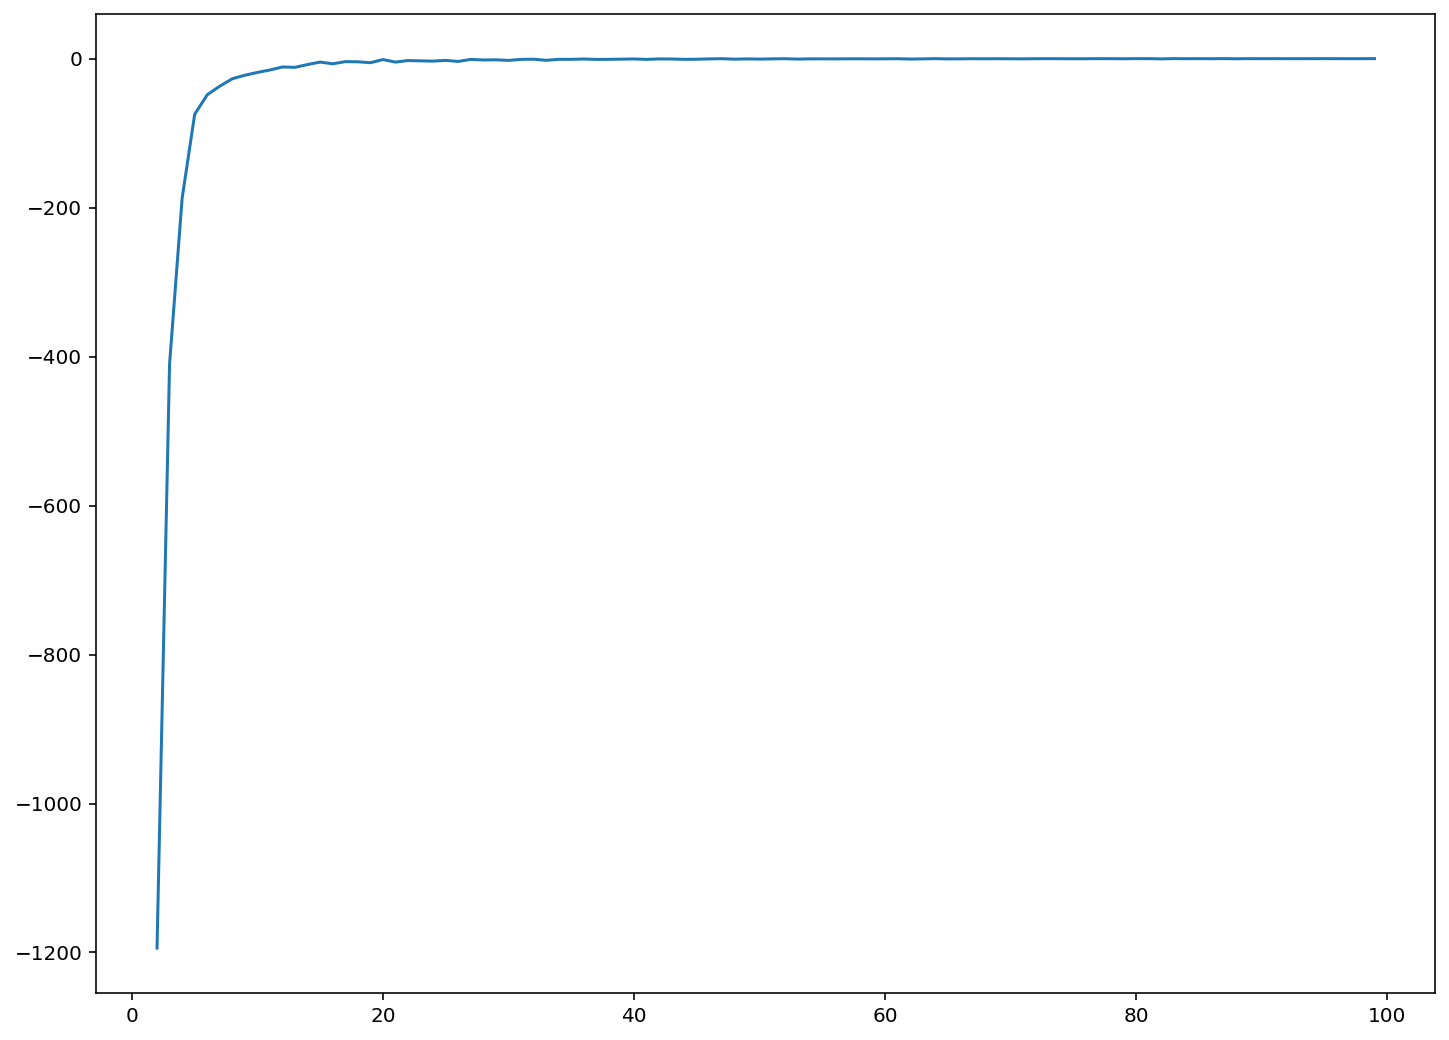

In [35]:
plt.plot(ks[1:], diff)

In [36]:
diff_r = diff[1:] / diff[:-1]

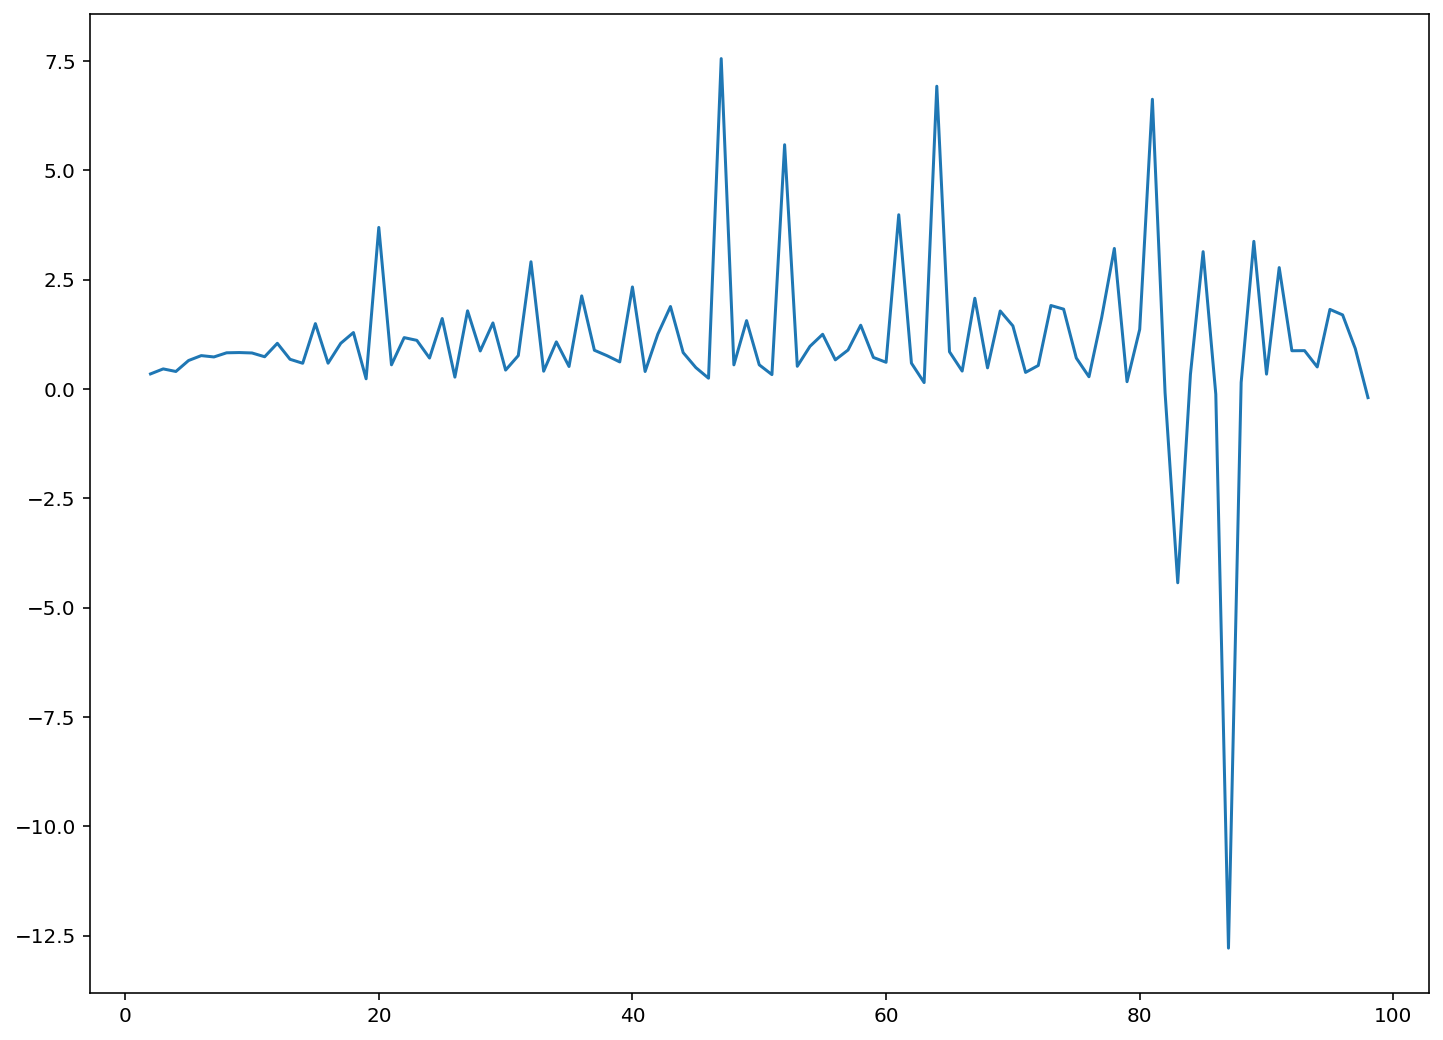

In [37]:
plt.plot(ks[1:-1], diff_r)

In [38]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

87